**局类模型**
+ 分类(class)与聚类(cluster)不同，分类是有监督学习模型，聚类属于无监督学习模型。
+ 聚类讲究使用一些算法把样本划分为n个群落，一般情况下，这些算法都需要计算欧氏距离(欧几里得距离)

**KMeans算法**
1. 随机选择k个样本作为k个聚类的中心，计算每个样本到各个聚类中心的欧氏距离，将该样本分配到与之距离最近的聚类中心所在类别中
2. 根据第1步所得到的聚类划分，分别计算每个聚类的几何中心，将几何中心作为新的聚类中心，重复第1步，直到计算所得几何中心与聚类中心重合或接近重合为止

KMeans算法特点：
+ 聚类数k必须事先已知。借助某些评估指标（轮廓系数），优选最好的聚类数
+ 聚类中心的初始选择会影响到最终聚类划分的结果。初始中心尽量选择距离较远的样本

**sklearn提供的KMeans聚类模型相关API**

In [ ]:
import sklearn.cluster as sc
x = None
# n_clusters:聚类数
model = sc.KMeans(n_clusters=4)
# 不断调整聚类中心，直到最终聚类中心稳定则聚类完成
model.fit(x)  # 只需要输入数据，因为是无监督学习，所以没有train_y
# 获取训练结果的聚类中心
labels = model.labels_  # 所有训练样本的类别标签
centers = model.cluster_centers_  # 聚类中心
pred_y = model.predict(x)  # 预测

In [8]:
import numpy as np
import pandas as pd
import sklearn.cluster as sc
import matplotlib.pyplot as plt

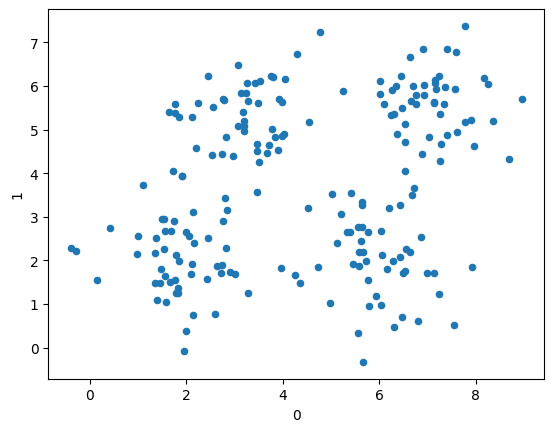

In [9]:
# 加载数据
data = pd.read_csv('./data/multiple3.txt', header=None)
data.plot.scatter(0,1,s=20)
plt.show()

**KMeans聚类**

In [66]:
model = sc.KMeans(n_clusters=4,n_init=10)  # 迭代次数
model.fit(data)
labels = model.labels_

# 计算轮廓系数
import sklearn.metrics as sm
s = sm.silhouette_score(data, labels,sample_size=len(data),metric='euclidean')
print(s)

0.5773232071896658


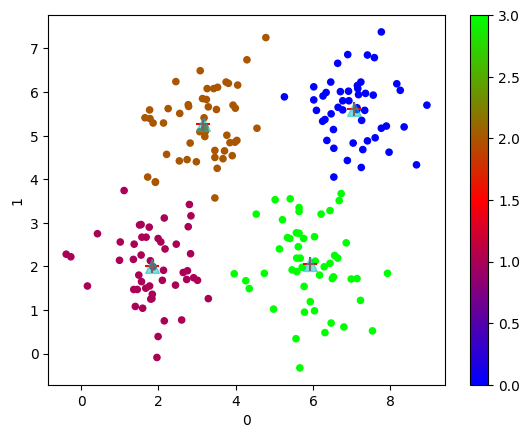

In [57]:
ax = data.plot.scatter(x=0,y=1,c=labels,cmap='brg')

# 绘制聚类中心
centers = model.cluster_centers_ 
for i in centers:
    a,b = i
    plt.scatter(x=a,y=b,color='red',s=100, marker='+')
    
# 另一种绘制方法
centers = pd.DataFrame(centers)
centers.plot.scatter(x=0,y=1,c='c',marker='^',s=100,ax=ax,alpha=0.5)
plt.show()

**DBSCAN算法实现聚类**

In [80]:
# 创建DBSCAN模型并训练模型
params = np.arange(0.5, 1, 0.1)
models, scores, epss = [], [], []
for param in params:
    model = sc.DBSCAN(eps=param, min_samples=5)
    model.fit(data)
    labels = model.labels_
    score = sm.silhouette_score(data,labels,sample_size=len(data),metric='euclidean')
    models.append(model)
    scores.append(score)
    epss.append(param)

best_ind = np.argmax(scores)  # 拿到轮廓系数最大的列表下标
best_model = models[best_ind]  # 通过最佳轮廓系数下标取值
best_score = scores[best_ind]
best_eps = epss[best_ind]
best_model,best_score,best_eps

(DBSCAN(eps=0.7999999999999999), 0.41779833446624154, 0.7999999999999999)

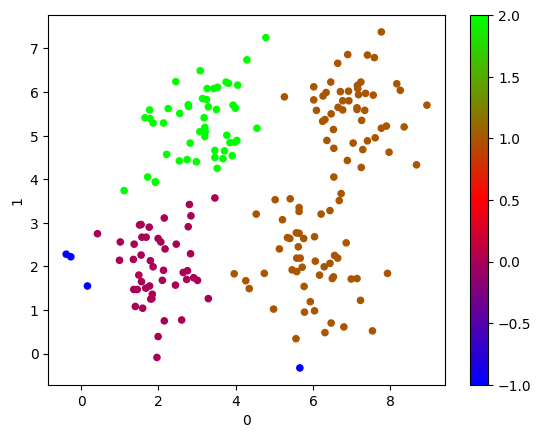

In [81]:
# 利用最优模型绘图
labels = best_model.labels_

data.plot.scatter(0,1,s=20,c=labels,cmap='brg')
plt.show()

In [93]:
# 核心样本
best_model.core_sample_indices_
data.loc[best_model.core_sample_indices_]

,0,1
1,2.84,3.16
2,4.74,1.84
3,6.36,4.89
4,1.77,1.55
5,4.29,6.74
...,...,...
195,6.64,6.66
196,2.15,0.75
197,3.26,6.08
198,5.72,1.98


In [87]:
# 孤立样本
data[labels==-1]

,0,1
26,5.66,-0.33
136,0.16,1.55
148,-0.27,2.22
164,-0.39,2.28
